# **Pemantauan dan Prediksi Banjir Berbasis Curah Hujan di Kabupaten Cilacap**
#### Projek ini merupakan tugas akhir dari pelatihan TSA DTS Kominfo 2023 yang dibuat oleh kelompok 4. Dengan berfokus pada forecast data curah hujan dan prediksi kejadian banjir, diharapkan dapat memberikan kontribusi signifikan dalam upaya pencegahan dan mitigasi dampak banjir di Kabupaten Cilacap.


## Daftar Isi


Daftar isi untuk proyek ini adalah sebagai berikut:-

1. Pernyataan masalah
2. Mengimport libraries
3. Mengimport dataset
4. Exploratory data analysis
    -	4.1 Dataset Banjir Jawa Tengah   
    -	4.2 Dataset Curah Hujan Kabupaten Cilacap
    -	4.3 Dataset Gabungan
5.	Visualisasi Data

## 1. Pernyataan masalah <a class="anchor" id="1"></a>

Dalam projek ini, tim kami memiliki tujuan utama untuk mengembangkan model prediksi kejadian banjir dan forecast curah hujan di Kabupaten Cilacap. Sebelum memasuki tahap pemodelan, langkah awal yang perlu diambil adalah melakukan preprocessing data untuk memastikan kebersihan dan kualitas data yang optimal. Proses ini melibatkan penanganan nilai-nilai yang hilang, transformasi data, dan penyusunan struktur dataset. Dengan dataset yang sudah siap, kami akan melangkah ke tahapan pemodelan untuk menciptakan model prediksi yang akurat dan berguna untuk mitigasi risiko banjir.

## 2. Mengimport libraries <a class="anchor" id="2"></a>
Sebelum memulai tahap analisis data, langkah awal yang kami lakukan adalah mengimpor berbagai libraries yang akan digunakan dalam projek ini.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 3. Mengimport dataset <a class="anchor" id="3"></a>

Langkah berikutnya dalam analisis data kami adalah mengimpor dataset yang akan digunakan dalam projek ini. Kami memanfaatkan dataset kejadian banjir dari Badan Nasional Penanggulangan Bencana (BNPB) dan data curah hujan harian di Kabupaten Cilacap dari World Weather Online. Data yang digunakan mulai dari Januari 2020 sampai Februari 2023 dan satuan untuk curah hujan yang dicatat adalah milimeter (mm).

Sumber data original kejadian banjir dari Badan Nasional Penanggulangan Bencana (BNPB) dapat diperoleh dari
[https://dibi.bnpb.go.id/](https://dibi.bnpb.go.id/).

Sumber data original curah hujan harian di Kabupaten Cilacap dari World Weather Online dapat diperoleh dari [https://www.worldweatheronline.com/](https://www.worldweatheronline.com/).

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path_1 = '/content/drive/MyDrive/Tugas DTS TSA/Dashboard Pemantauan dan Prediksi Banjir Kabupaten Cilacap/Dataset/banjir_dataset.csv'
file_path_2 = '/content/drive/MyDrive/Tugas DTS TSA/Dashboard Pemantauan dan Prediksi Banjir Kabupaten Cilacap/Dataset/curah_hujan_dataset.csv'

In [ ]:
# Data Kejadian Banjir di Jawa Tengah
df_banjir = pd.read_csv(file_path_1)

# Data Curah Hujan di Kabupaten Cilacap
df_curah_hujan = pd.read_csv(file_path_2)

## 4. Exploratory data analysis <a class="anchor" id="4"></a>

### Dataset Banjir Jawa Tengah <a class="anchor" id="4.1"></a>

In [ ]:
# Menampilkan dataset banjir
df_banjir

,Waktu,Kejadian,Penyebab,Keterangan,Lokasi,Posisi
0,2020-01-01,Banjir,NaN,NaN,Brebes,"-6.889504199999999, 108.91753870000002"
1,2020-01-01,Banjir,NaN,NaN,Purworejo,"-7.58102, 109.90407"
2,2020-01-02,Tidak Banjir,NaN,NaN,NaN,NaN
3,2020-01-03,Banjir,NaN,"40 sumur tercemar, Ketinggian air mengenang se...",Cilacap,"-7.64872, 109.15607"
4,2020-01-03,Banjir,NaN,NaN,Wonosobo,"-7.26501, 109.91932"
...,...,...,...,...,...,...
1301,2023-01-31,Tidak Banjir,NaN,NaN,NaN,NaN
1302,2023-02-01,Tidak Banjir,NaN,NaN,NaN,NaN
1303,2023-02-02,Tidak Banjir,NaN,NaN,NaN,NaN
1304,2023-02-03,Tidak Banjir,NaN,NaN,NaN,NaN


In [ ]:
kolom_b = df_banjir.columns
shape_b = df_banjir.shape

print("Nama Kolom: ", kolom_b,"\n")
print("Shape: ", shape_b)

Nama Kolom:  Index(['Waktu', 'Kejadian', 'Penyebab', 'Keterangan', 'Lokasi', 'Posisi'], dtype='object') 

Shape:  (1306, 6)


In [ ]:
# Melihat summary dari dataset
df_banjir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Waktu       1306 non-null   object
 1   Kejadian    1306 non-null   object
 2   Penyebab    158 non-null    object
 3   Keterangan  241 non-null    object
 4   Lokasi      448 non-null    object
 5   Posisi      448 non-null    object
dtypes: object(6)
memory usage: 61.3+ KB


In [ ]:
# Melihat properti statistik dataset
df_banjir.describe()

,Waktu,Kejadian,Penyebab,Keterangan,Lokasi,Posisi
count,1306,1306,158,241,448,448
unique,1131,49,141,238,46,434
top,2020-01-25,Tidak Banjir,Hujan Lebat,TMA 50 CM,Cilacap,"-7.097924, 110.8942"
freq,9,856,7,2,62,5


In [ ]:
# Menampilkan nilai distribusi frekuensi pada kolom 'Kejadian'
df_banjir['Kejadian'].value_counts()

Tidak Banjir                                                                                                      856
Banjir                                                                                                            377
BANJIR                                                                                                             14
Banjir Luapan                                                                                                       7
banjir                                                                                                              4
Banjir Bandang                                                                                                      3
Banjir Limpas                                                                                                       3
Kejadian Banjir di Desa Rawajaya dan Desa Bantarsari Kec. Bantarsari                                                1
Rob disertai Banjir                                     

In [ ]:
# Mengubah nilai kolom 'Kejadian' dengan nilai 'Tidak Banjir' dan 'Banjir'
df_banjir['Kejadian'] = df_banjir['Kejadian'].apply(lambda x: 'Banjir' if x != 'Tidak Banjir' else x)
df_banjir['Kejadian'].value_counts()

Tidak Banjir    856
Banjir          450
Name: Kejadian, dtype: int64

In [ ]:
# Menghapus nilai duplikat
df_banjir.drop_duplicates(subset=['Waktu', 'Lokasi'], keep='first', inplace=True)

In [ ]:
# Menampilkan nilai distribusi frekuensi pada kolom 'Lokasi'
df_banjir['Lokasi'].value_counts()

Cilacap           62
Grobogan          52
Pati              36
Banyumas          25
Kebumen           23
Jepara            18
Kota Semarang     18
Purworejo         16
Rembang           16
Kendal            14
Boyolali          13
Wonogiri          13
Kudus             12
Banjarnegara      11
Pekalongan         8
Blora              8
Batang             8
Demak              8
Wonosobo           7
Karanganyar        7
Brebes             7
Klaten             6
Kota Surakarta     6
Purbalingga        5
Sukoharjo          5
Pemalang           4
Semarang           4
Tuban              4
Sragen             4
Sukaharjo          3
Magelang           3
Temanggung         3
Ponogoro           2
Bojonegoro         2
Kota Tegal         2
Ngawi              2
Pacitan            1
Ponorogo           1
Pacetan            1
Sleman             1
Madiun             1
Tegal              1
Tulungagung        1
Geyer              1
Gubug              1
Kota Salatiga      1
Name: Lokasi, dtype: int64

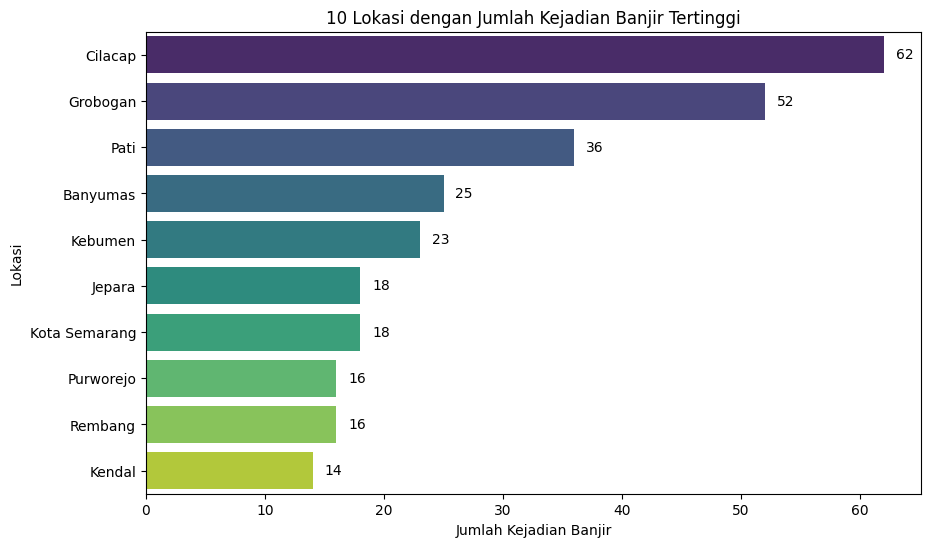

In [ ]:
# Membuat visualisasi dengan plot
import seaborn as sns
import matplotlib.pyplot as plt

# Data dari df_banjir['Lokasi'].value_counts()
data = df_banjir['Lokasi'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=data.values, y=data.index, palette="viridis")

# Add labels and a title
plt.xlabel("Jumlah Kejadian Banjir")
plt.ylabel("Lokasi")
plt.title("10 Lokasi dengan Jumlah Kejadian Banjir Tertinggi")

# Add labels to the bars
for i, v in enumerate(data.values):
    plt.text(v + 1, i, str(v), color='black', va='center')

# Show the plot
plt.show()

Terlihat dari diagram batang (bar chart), dapat disimpulkan bahwa **Kabupaten Cilacap** merupakan daerah yang sering mengalami banjir dalam periode dari Januari 2020 hingga Februari 2023. Informasi ini menjadi dasar bagi tim kami untuk memusatkan perhatian pada upaya pencegahan banjir di Kabupaten Cilacap.

### Dataset Curah Hujan Kabupaten Cilacap <a class="anchor" id="4.2"></a>

In [ ]:
# Menampilkan dataset curah hujan
df_curah_hujan

,date,hujan_0,hujan_300,hujan_600,hujan_900,hujan_1200,hujan_1500,hujan_2100,min_hujan,max_hujan,avg_hujan
0,2020-01-01,1.6,0.0,1.5,0.0,0.2,0.2,2.1,0.0,2.1,0.800000
1,2020-01-02,0.4,0.0,0.0,0.0,0.1,7.8,2.4,0.0,7.8,1.528571
2,2020-01-03,0.0,0.0,0.0,0.2,0.1,8.1,1.3,0.0,8.1,1.385714
3,2020-01-04,0.2,1.1,0.0,0.0,0.0,0.7,1.3,0.0,1.3,0.471429
4,2020-01-05,0.2,0.5,0.0,0.0,1.1,3.0,0.0,0.0,3.0,0.685714
...,...,...,...,...,...,...,...,...,...,...,...
1126,2023-01-31,0.0,0.0,0.0,0.0,0.0,6.0,0.1,0.0,6.0,0.871429
1127,2023-02-01,0.0,0.0,0.0,0.0,0.1,5.7,2.4,0.0,5.7,1.171429
1128,2023-02-02,0.0,0.2,0.1,0.0,0.1,1.2,0.0,0.0,1.2,0.228571
1129,2023-02-03,0.0,0.4,0.3,0.2,0.0,0.1,0.0,0.0,0.4,0.142857


In [ ]:
kolom_ch = df_curah_hujan.columns
shape_ch = df_curah_hujan.shape

print("Nama Kolom: ", kolom_ch,"\n")
print("Shape: ", shape_ch)

Nama Kolom:  Index(['date', 'hujan_0', 'hujan_300', 'hujan_600', 'hujan_900', 'hujan_1200',
       'hujan_1500', 'hujan_2100', 'min_hujan', 'max_hujan', 'avg_hujan'],
      dtype='object') 

Shape:  (1131, 11)


In [ ]:
# Melihat summary dari dataset
df_curah_hujan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1131 non-null   object 
 1   hujan_0     1131 non-null   float64
 2   hujan_300   1131 non-null   float64
 3   hujan_600   1131 non-null   float64
 4   hujan_900   1131 non-null   float64
 5   hujan_1200  1131 non-null   float64
 6   hujan_1500  1131 non-null   float64
 7   hujan_2100  1131 non-null   float64
 8   min_hujan   1131 non-null   float64
 9   max_hujan   1131 non-null   float64
 10  avg_hujan   1131 non-null   float64
dtypes: float64(10), object(1)
memory usage: 97.3+ KB


In [ ]:
# Melihat properti statistik dataset
df_curah_hujan.describe()

,hujan_0,hujan_300,hujan_600,hujan_900,hujan_1200,hujan_1500,hujan_2100,min_hujan,max_hujan,avg_hujan
count,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000
mean,0.219805,0.209195,0.144385,0.130858,0.465429,1.289478,0.527321,0.008665,1.904421,0.426639
std,0.661639,0.663328,0.466916,0.370043,1.152250,2.413913,0.925062,0.050965,2.516603,0.527767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.057143
50%,0.000000,0.000000,0.000000,0.000000,0.100000,0.200000,0.000000,0.000000,0.900000,0.214286
75%,0.100000,0.100000,0.050000,0.100000,0.300000,1.400000,0.600000,0.000000,2.600000,0.628571
max,10.000000,11.400000,8.400000,5.400000,9.700000,17.700000,6.000000,0.800000,17.700000,3.885714


### Dataset Gabungan <a class="anchor" id="4.3"></a>

In [ ]:
# Menampilkan data pada Lokasi Cilacap
cilacap_data = df_banjir[df_banjir['Lokasi'] == 'Cilacap']
cilacap_data

,Waktu,Kejadian,Penyebab,Keterangan,Lokasi,Posisi
3,2020-01-03,Banjir,NaN,"40 sumur tercemar, Ketinggian air mengenang se...",Cilacap,"-7.64872, 109.15607"
6,2020-01-05,Banjir,NaN,NaN,Cilacap,"-7.62933, 108.81783"
11,2020-01-08,Banjir,NaN,NaN,Cilacap,"-7.461792, 108.805211"
51,2020-01-30,Banjir,NaN,NaN,Cilacap,"-7.81894, 109.209"
61,2020-02-07,Banjir,NaN,NaN,Cilacap,"-7.55941, 108.9601"
...,...,...,...,...,...,...
1179,2022-10-09,Banjir,NaN,I. Waktu Kejadian Hari : Minggu Tanggal : 9 Ok...,Cilacap,"-7.6058765, 109.0814335"
1183,2022-10-13,Banjir,NaN,A WAKTU PELAKSANAAN Hari :Kamis Tanggal:13 Okt...,Cilacap,"-7.5645283, 109.211675"
1187,2022-10-15,Banjir,Pengaruh Hidrometeorologi dimana dalam beberap...,I. Waktu : Hari : Sabtu. Tgl : 15 - 10 - 2022....,Cilacap,"-7.656633, 109.3542444"
1210,2022-11-03,Banjir,-Hujan intensitas sedang dan tinggi serta peng...,Hujan dengan intensitas sedang dan tinggi meng...,Cilacap,"-7.607056, 109.243535"


In [ ]:
# Menambahkan kolom 'Waktu'
df_curah_hujan['Waktu'] = df_curah_hujan['date']
df_curah_hujan

,date,hujan_0,hujan_300,hujan_600,hujan_900,hujan_1200,hujan_1500,hujan_2100,min_hujan,max_hujan,avg_hujan,Waktu
0,2020-01-01,1.6,0.0,1.5,0.0,0.2,0.2,2.1,0.0,2.1,0.800000,2020-01-01
1,2020-01-02,0.4,0.0,0.0,0.0,0.1,7.8,2.4,0.0,7.8,1.528571,2020-01-02
2,2020-01-03,0.0,0.0,0.0,0.2,0.1,8.1,1.3,0.0,8.1,1.385714,2020-01-03
3,2020-01-04,0.2,1.1,0.0,0.0,0.0,0.7,1.3,0.0,1.3,0.471429,2020-01-04
4,2020-01-05,0.2,0.5,0.0,0.0,1.1,3.0,0.0,0.0,3.0,0.685714,2020-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
1126,2023-01-31,0.0,0.0,0.0,0.0,0.0,6.0,0.1,0.0,6.0,0.871429,2023-01-31
1127,2023-02-01,0.0,0.0,0.0,0.0,0.1,5.7,2.4,0.0,5.7,1.171429,2023-02-01
1128,2023-02-02,0.0,0.2,0.1,0.0,0.1,1.2,0.0,0.0,1.2,0.228571,2023-02-02
1129,2023-02-03,0.0,0.4,0.3,0.2,0.0,0.1,0.0,0.0,0.4,0.142857,2023-02-03


In [ ]:
# Melakukan penggabungan dataset berdasarkan kolom 'Waktu'
merged_df = pd.merge(cilacap_data, df_curah_hujan, on='Waktu', how='right')
merged_df

,Waktu,Kejadian,Penyebab,Keterangan,Lokasi,Posisi,date,hujan_0,hujan_300,hujan_600,hujan_900,hujan_1200,hujan_1500,hujan_2100,min_hujan,max_hujan,avg_hujan
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,2020-01-01,1.6,0.0,1.5,0.0,0.2,0.2,2.1,0.0,2.1,0.800000
1,2020-01-02,NaN,NaN,NaN,NaN,NaN,2020-01-02,0.4,0.0,0.0,0.0,0.1,7.8,2.4,0.0,7.8,1.528571
2,2020-01-03,Banjir,NaN,"40 sumur tercemar, Ketinggian air mengenang se...",Cilacap,"-7.64872, 109.15607",2020-01-03,0.0,0.0,0.0,0.2,0.1,8.1,1.3,0.0,8.1,1.385714
3,2020-01-04,NaN,NaN,NaN,NaN,NaN,2020-01-04,0.2,1.1,0.0,0.0,0.0,0.7,1.3,0.0,1.3,0.471429
4,2020-01-05,Banjir,NaN,NaN,Cilacap,"-7.62933, 108.81783",2020-01-05,0.2,0.5,0.0,0.0,1.1,3.0,0.0,0.0,3.0,0.685714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,2023-01-31,NaN,NaN,NaN,NaN,NaN,2023-01-31,0.0,0.0,0.0,0.0,0.0,6.0,0.1,0.0,6.0,0.871429
1127,2023-02-01,NaN,NaN,NaN,NaN,NaN,2023-02-01,0.0,0.0,0.0,0.0,0.1,5.7,2.4,0.0,5.7,1.171429
1128,2023-02-02,NaN,NaN,NaN,NaN,NaN,2023-02-02,0.0,0.2,0.1,0.0,0.1,1.2,0.0,0.0,1.2,0.228571
1129,2023-02-03,NaN,NaN,NaN,NaN,NaN,2023-02-03,0.0,0.4,0.3,0.2,0.0,0.1,0.0,0.0,0.4,0.142857


In [ ]:
# Menghapus kolom 'date'
final_df = merged_df.drop('date', axis=1)

# Mengubah nama kolom 'Waktu' menjadi 'date'
final_df.rename(columns={'Waktu': 'date'}, inplace=True)

# Mengatasi missing value
final_df['Kejadian'] = final_df['Kejadian'].fillna('Tidak Banjir')
final_df['Lokasi'] = final_df['Lokasi'].fillna('Cilacap')

final_df

,date,Kejadian,Penyebab,Keterangan,Lokasi,Posisi,hujan_0,hujan_300,hujan_600,hujan_900,hujan_1200,hujan_1500,hujan_2100,min_hujan,max_hujan,avg_hujan
0,2020-01-01,Tidak Banjir,NaN,NaN,Cilacap,NaN,1.6,0.0,1.5,0.0,0.2,0.2,2.1,0.0,2.1,0.800000
1,2020-01-02,Tidak Banjir,NaN,NaN,Cilacap,NaN,0.4,0.0,0.0,0.0,0.1,7.8,2.4,0.0,7.8,1.528571
2,2020-01-03,Banjir,NaN,"40 sumur tercemar, Ketinggian air mengenang se...",Cilacap,"-7.64872, 109.15607",0.0,0.0,0.0,0.2,0.1,8.1,1.3,0.0,8.1,1.385714
3,2020-01-04,Tidak Banjir,NaN,NaN,Cilacap,NaN,0.2,1.1,0.0,0.0,0.0,0.7,1.3,0.0,1.3,0.471429
4,2020-01-05,Banjir,NaN,NaN,Cilacap,"-7.62933, 108.81783",0.2,0.5,0.0,0.0,1.1,3.0,0.0,0.0,3.0,0.685714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,2023-01-31,Tidak Banjir,NaN,NaN,Cilacap,NaN,0.0,0.0,0.0,0.0,0.0,6.0,0.1,0.0,6.0,0.871429
1127,2023-02-01,Tidak Banjir,NaN,NaN,Cilacap,NaN,0.0,0.0,0.0,0.0,0.1,5.7,2.4,0.0,5.7,1.171429
1128,2023-02-02,Tidak Banjir,NaN,NaN,Cilacap,NaN,0.0,0.2,0.1,0.0,0.1,1.2,0.0,0.0,1.2,0.228571
1129,2023-02-03,Tidak Banjir,NaN,NaN,Cilacap,NaN,0.0,0.4,0.3,0.2,0.0,0.1,0.0,0.0,0.4,0.142857


In [ ]:
# Download dalam bentuk CSV
final_df.to_csv('cilacap_final_dataset.csv', header=True, index=False)

Setelah melalui berbagai tahapan analisis, kini kita berhasil mendapatkan dataset final yang akan kita gunakan pada model prediksi ataupun model forecast.

## 5. Visualisasi Data <a class="anchor" id="5"></a>

In [ ]:
final_df = pd.read_csv('/content/cilacap_final_dataset.csv')
final_df

,date,Kejadian,Penyebab,Keterangan,Lokasi,Posisi,hujan_0,hujan_300,hujan_600,hujan_900,hujan_1200,hujan_1500,hujan_2100,min_hujan,max_hujan,avg_hujan
0,2020-01-01,Tidak Banjir,NaN,NaN,Cilacap,NaN,1.6,0.0,1.5,0.0,0.2,0.2,2.1,0.0,2.1,0.800000
1,2020-01-02,Tidak Banjir,NaN,NaN,Cilacap,NaN,0.4,0.0,0.0,0.0,0.1,7.8,2.4,0.0,7.8,1.528571
2,2020-01-03,Banjir,NaN,"40 sumur tercemar, Ketinggian air mengenang se...",Cilacap,"-7.64872, 109.15607",0.0,0.0,0.0,0.2,0.1,8.1,1.3,0.0,8.1,1.385714
3,2020-01-04,Tidak Banjir,NaN,NaN,Cilacap,NaN,0.2,1.1,0.0,0.0,0.0,0.7,1.3,0.0,1.3,0.471429
4,2020-01-05,Banjir,NaN,NaN,Cilacap,"-7.62933, 108.81783",0.2,0.5,0.0,0.0,1.1,3.0,0.0,0.0,3.0,0.685714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,2023-01-31,Tidak Banjir,NaN,NaN,Cilacap,NaN,0.0,0.0,0.0,0.0,0.0,6.0,0.1,0.0,6.0,0.871429
1127,2023-02-01,Tidak Banjir,NaN,NaN,Cilacap,NaN,0.0,0.0,0.0,0.0,0.1,5.7,2.4,0.0,5.7,1.171429
1128,2023-02-02,Tidak Banjir,NaN,NaN,Cilacap,NaN,0.0,0.2,0.1,0.0,0.1,1.2,0.0,0.0,1.2,0.228571
1129,2023-02-03,Tidak Banjir,NaN,NaN,Cilacap,NaN,0.0,0.4,0.3,0.2,0.0,0.1,0.0,0.0,0.4,0.142857


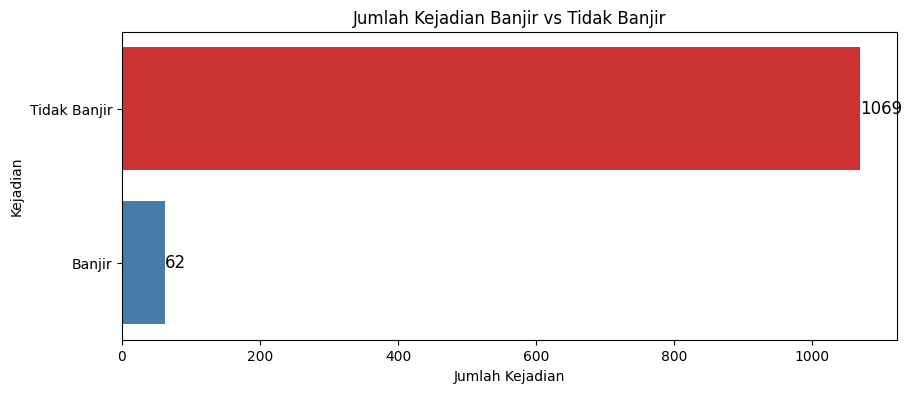

In [ ]:
# Memvisualisasikan jumlah kejadian banjir vs tidak banjir

# Create a barplot using Seaborn
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=final_df['Kejadian'].value_counts(), y=final_df['Kejadian'].value_counts().index, palette="Set1")

# Annotate the count values on the right side of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', color='black', size=12)

# Set labels
plt.xlabel('Jumlah Kejadian')
plt.ylabel('Kejadian')
plt.title('Jumlah Kejadian Banjir vs Tidak Banjir')

plt.show()


Tampak perbedaan cukup signifikan antara kategori "Tidak Banjir" dan "Banjir" dalam kolom "Kejadian", di mana terdapat 1069 entri untuk "Tidak Banjir" dan hanya 62 entri untuk "Banjir". Perbedaan jumlah ini dapat berpengaruh pada kinerja model prediksi, karena model mungkin menjadi bias terhadap kategori mayoritas (dalam hal ini, "Tidak Banjir").

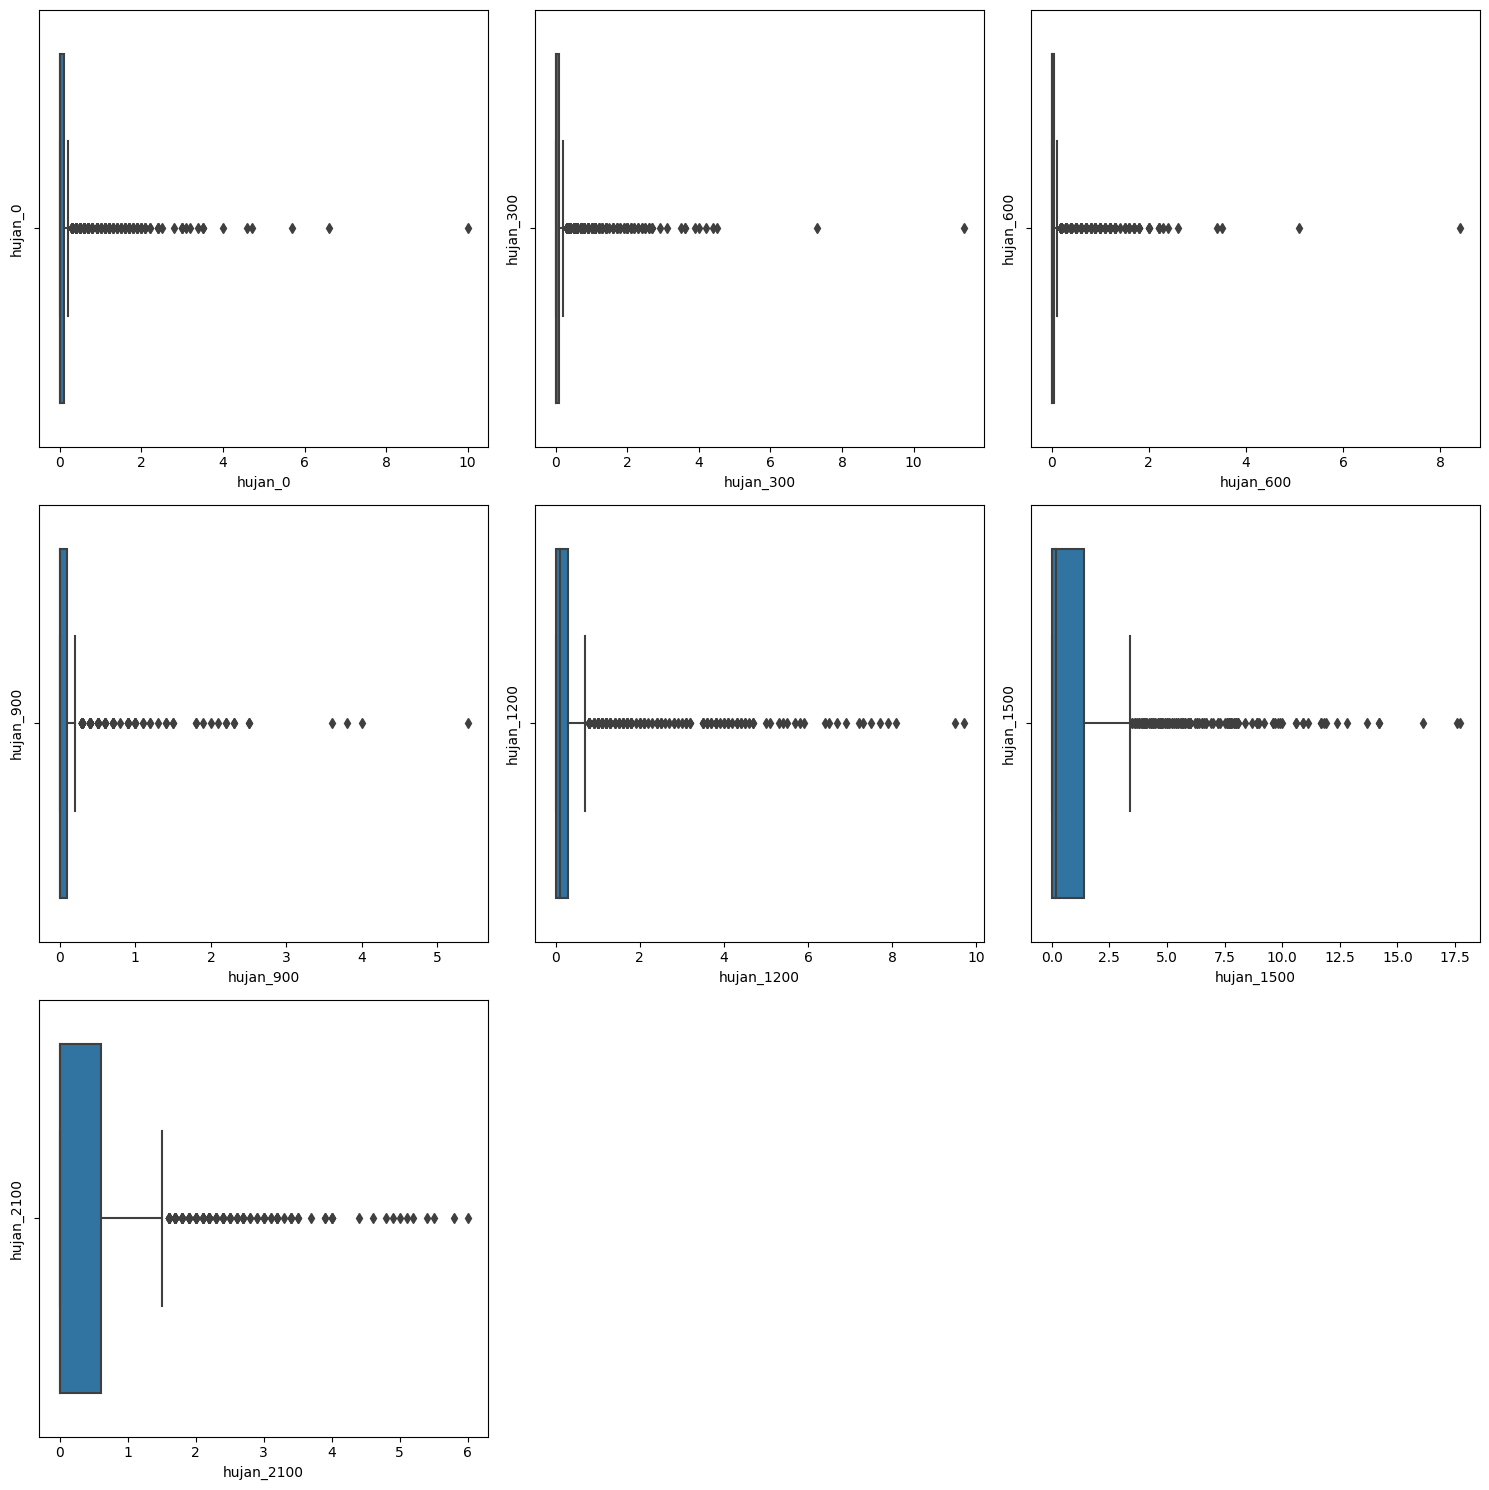

In [ ]:
# Memvisualisasikan outlier

# Define the list of columns for which you want to create boxplots
columns_to_plot = ['hujan_0', 'hujan_300', 'hujan_600', 'hujan_900', 'hujan_1200', 'hujan_1500', 'hujan_2100']

# Set up the subplot grid
plt.figure(figsize=(15, 15))

# Use Seaborn boxplot for horizontal boxplots
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=final_df[column])
    plt.title('')
    plt.ylabel(column)

plt.tight_layout()

# Show the plots
plt.show()


Dari visualisasi boxplot di atas, dapat terlihat bahwa sebagian besar variabel hujan memiliki beberapa pencilan (outlier). Pencilan tersebut tercermin dari titik-titik di luar batas whisker (garis vertikal pada boxplot). Pencilan ini menunjukkan adanya nilai yang jauh dari nilai-nilai lain dalam distribusi data. Keberadaan outlier bisa menjadi penting untuk dipertimbangkan, karena dapat mempengaruhi analisis statistik dan interpretasi hasil. Oleh karena itu, perlu dilakukan evaluasi lebih lanjut untuk memahami sumber dan dampak dari outlier tersebut terhadap analisis data.

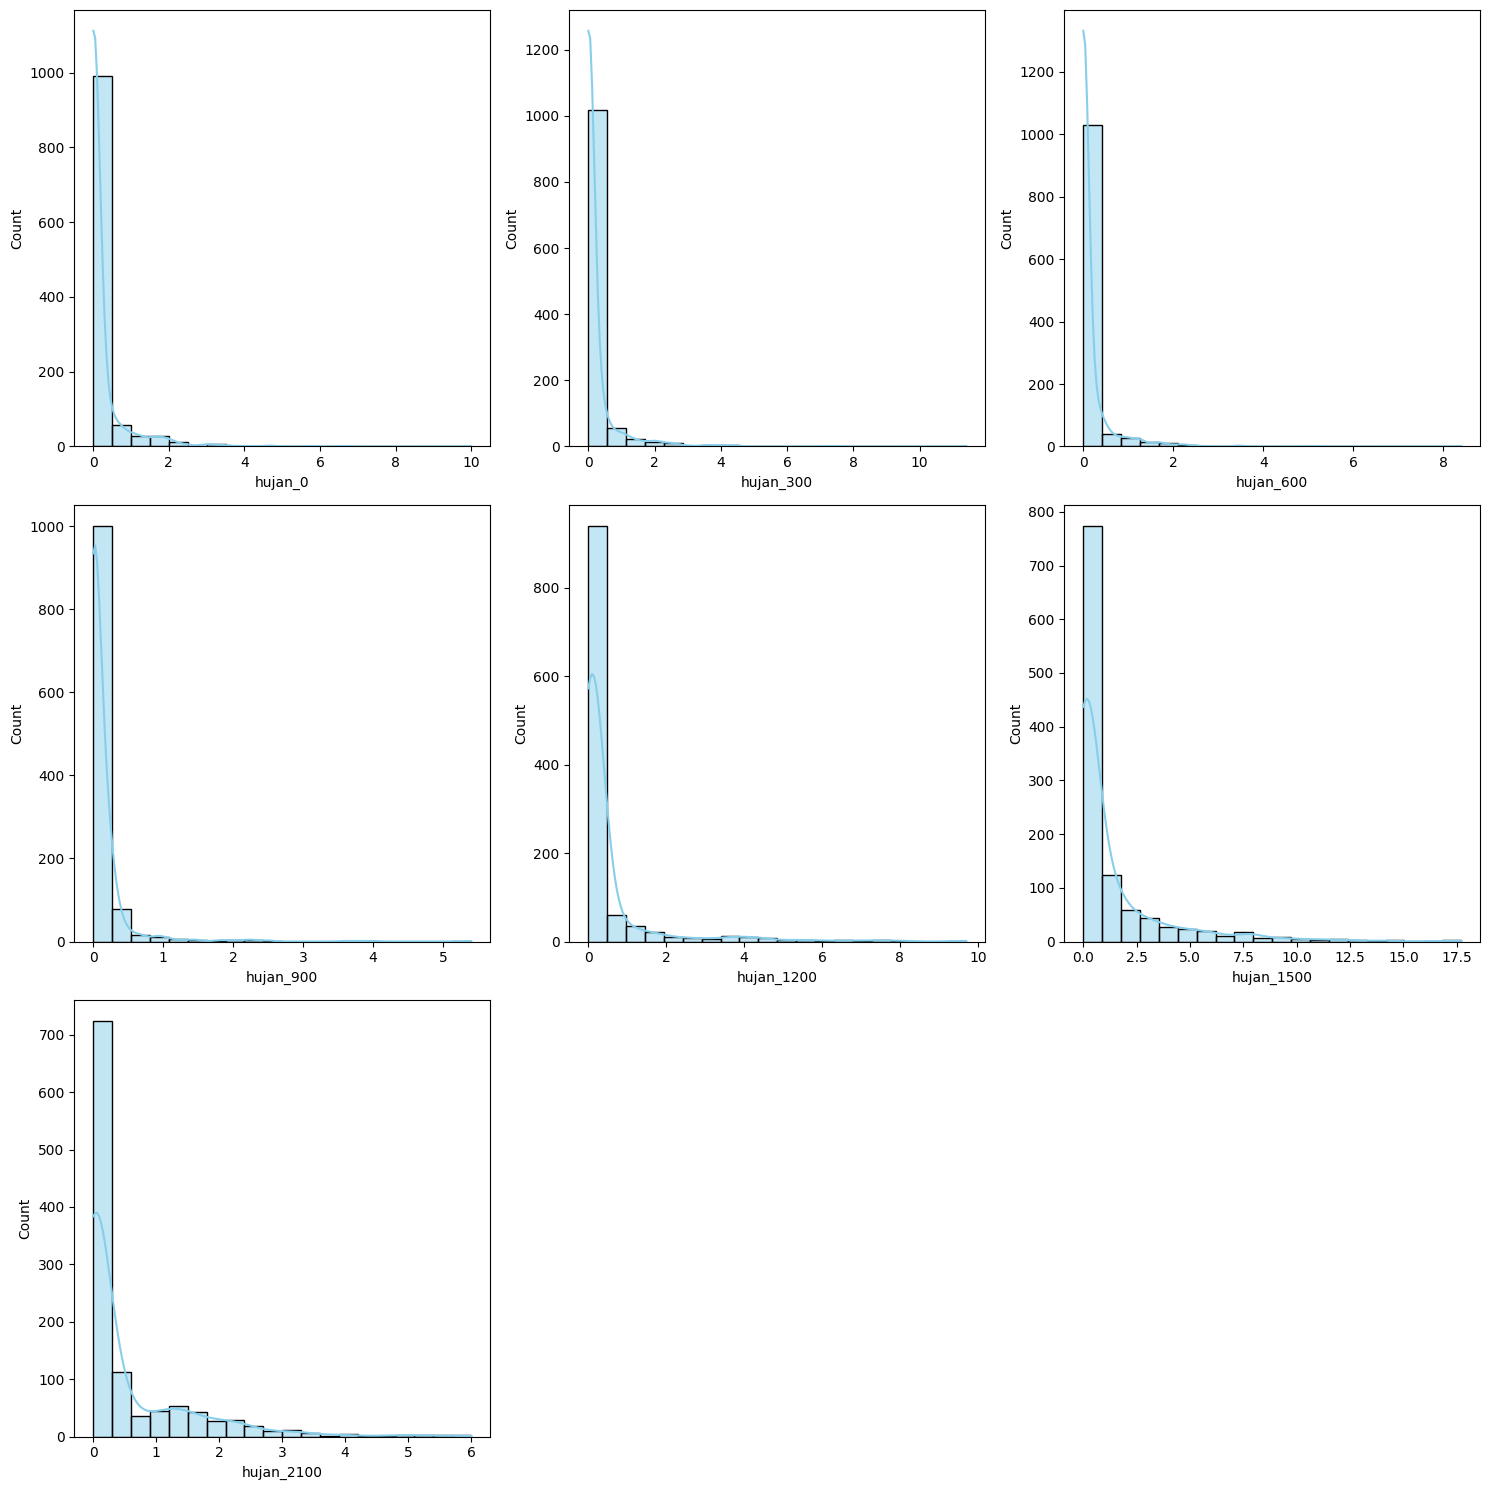

In [ ]:
# Memvisualisasikan persebaran data

# Set up the subplot grid
plt.figure(figsize=(15, 15))

# Use Seaborn distplot for histograms
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(final_df[column], bins=20, kde=True, color='skyblue')
    plt.title('')
    plt.xlabel(column)

plt.tight_layout()

# Show the plots
plt.show()

Dari visualisasi histogram di atas, terlihat bahwa sebagian besar variabel hujan menunjukkan kecenderungan data yang menumpuk di sebelah kiri. Kecenderungan ini dapat diartikan bahwa sebagian besar data memiliki nilai yang relatif rendah, sedangkan frekuensi nilai yang tinggi terjadi pada rentang tersebut. Distribusi data yang condong ke kiri ini mengindikasikan bahwa sebagian besar observasi memiliki nilai yang cenderung kecil, sementara nilai yang tinggi menjadi lebih jarang. Hal ini dapat memberikan wawasan tentang karakteristik distribusi data untuk setiap variabel hujan yang diamati.

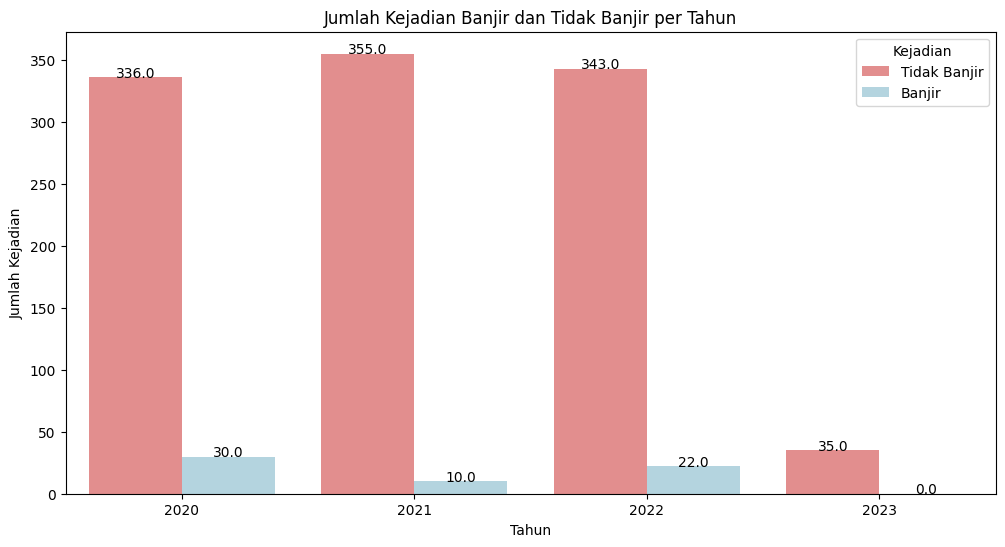

In [ ]:
# Memvisualisasikan jumlah kejadian 'Banjir' vs 'Tidak Banjir' per tahun

# Assuming 'date' is the datetime column and 'Kejadian' is the event column
final_df['date'] = pd.to_datetime(final_df['date'], format='%Y-%m-%d')
final_df['Tahun'] = final_df['date'].dt.year

# Filter data for 'Banjir' and 'Tidak Banjir' events
df_filtered = final_df[final_df['Kejadian'].isin(['Banjir', 'Tidak Banjir'])]

# Create a countplot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Tahun', hue='Kejadian', data=df_filtered, palette=['lightcoral', 'lightblue'], order=df_filtered['Tahun'].unique())

# Annotate the count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', color='black', size=10)

plt.title("Jumlah Kejadian Banjir dan Tidak Banjir per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kejadian")
plt.legend(title="Kejadian", labels=['Tidak Banjir', 'Banjir'])
plt.show()

Dari plot jumlah kejadian 'Banjir' vs 'Tidak Banjir' per tahun, terlihat bahwa terdapat perbedaan signifikan antara frekuensi kejadian 'Banjir' dan 'Tidak Banjir' pada setiap tahun. Khususnya, beberapa tahun menunjukkan jumlah kejadian 'Banjir' yang jauh lebih rendah dibandingkan dengan 'Tidak Banjir', menciptakan ketidakseimbangan dalam dataset. Kondisi ini dapat menjadi sumber potensi bias dalam model prediksi, di mana model mungkin cenderung lebih baik dalam memprediksi mayoritas kategori ('Tidak Banjir') dan kurang akurat dalam memprediksi kategori minoritas ('Banjir'). Penting untuk memperhatikan ketidakseimbangan ini dan mempertimbangkan strategi resampling atau teknik lainnya selama proses pemodelan untuk meningkatkan kinerja model terhadap kategori minoritas.

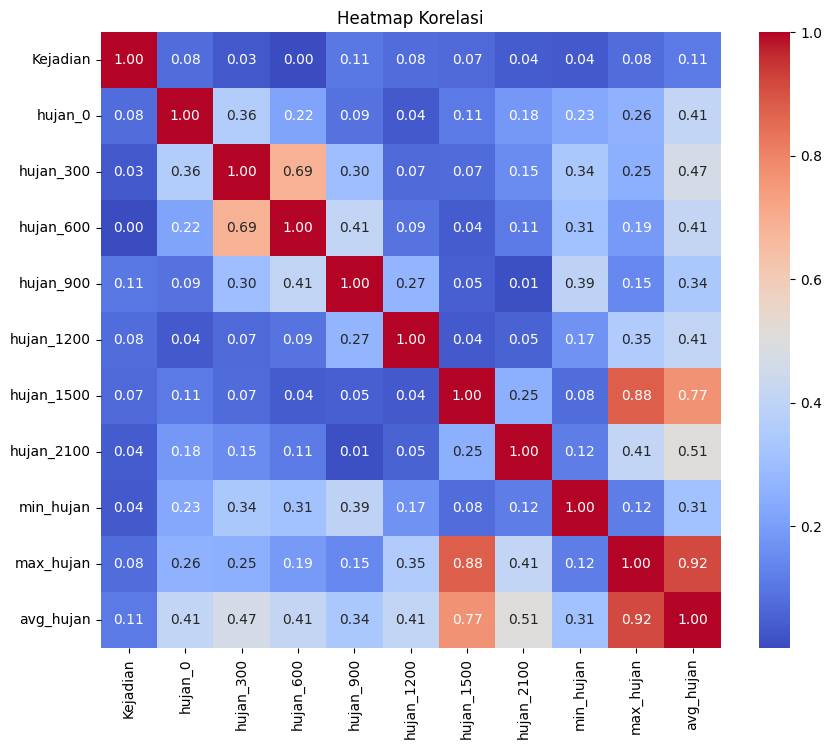

In [ ]:
# Memvisualisasikan heatmap

# Mengganti nilai 'Tidak Banjir' menjadi 0 dan 'Banjir' menjadi 1
df_trained['Kejadian'] = df_trained['Kejadian'].map({'Tidak Banjir': 0, 'Banjir': 1})

df_trained = final_df[['Kejadian','hujan_0',	'hujan_300',	'hujan_600', 'hujan_900', 'hujan_1200',	'hujan_1500',	'hujan_2100',	'min_hujan',	'max_hujan',	'avg_hujan']]

# Menghitung matriks korelasi
correlation_matrix = df_trained.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

Dari heatmap korelasi di atas, kita dapat menyimpulkan bahwa:

      - Variabel hujan_300 dan hujan_600 memiliki korelasi positif tinggi (koefisien korelasi = 0.69).

      - Variabel hujan_1500 dan max_hujan juga memiliki korelasi positif tinggi (koefisien korelasi = 0.88).

      - Variabel hujan_1500 dan avg_hujan memiliki korelasi positif tinggi (koefisien korelasi = 0.77).

      - Variabel avg_hujan dan max_hujan memiliki korelasi positif kuat (koefisien korelasi = 0.92).